<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFO5731 Assignment Four**

n this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.


#**Question 1: Topic Modeling**



(30 points).This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, select two models and write a python program to identify the top 20 topics (with 15 words for each topic) in the dataset. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1) Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2) Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3) HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4) SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5) Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6) LDA2VEC: https://github.com/cemoody/lda2vec

(7) BERTopic: https://github.com/MaartenGr/BERTopic

(8) LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9) Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)

The following information should be reported:

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster.

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis




In [55]:

import pickle
import logging
 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from zipfile import ZipFile 
workingDirecoty = '/content/Assignment four data Yelp (question 1 and 2).zip'

with ZipFile(workingDirecoty, 'r') as item:  
    print('Extracting all the files now...') 
    item.extractall() 
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
# read the list of files in folders
import glob
import json
filename = glob.glob("/content/Assignment four data Yelp (question 1 and 2)/*.json")
text_field = list()
stars = list()
date_value = list()
def set_sentiment(ip):
  if(ip == 5):
    return "Very positive"
  elif(ip==4):
    return "Positive"
  elif(ip==3):
    return "Neutral"
  elif(ip==2):
    return "Negative"
  elif(ip==1):
    return "Very Negative"
tokens = list()
for file in filename:
  with open(file,encoding = "utf-8") as i:
    json_data = json.load(i)
    for data in json_data:
      text_field.append(data['text'])
      stars.append(data['stars'])
      date_value.append(data['date'])
      tokens.append(set_sentiment(data['stars']))



In [ ]:
import pandas as pd

required_df = pd.DataFrame(text_field,columns = ["Review"])
required_df["Rating"] = stars
required_df["Date"] = date_value
required_df["sentiments"] = tokens

In [ ]:
#display the dataframe
required_df.head(5)

,Review,Rating,Date,sentiments
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive


**Data Cleaning**

In [ ]:
required_df["cleaned_data"] = required_df["Review"].apply(lambda x : x.lower())
import string
required_df["cleaned_data"] = required_df["cleaned_data"].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_of_words = set(stopwords.words('english'))
required_df["cleaned_data"] = required_df["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in list_of_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

frequent_words = list(pd.Series(' '.join(required_df['cleaned_data']).split()).value_counts()[:15].index)
#top 15 rare words
rare_words = list(pd.Series(' '.join(required_df['cleaned_data']).split()).value_counts()[-15:].index)

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
required_df["cleaned_data"] = required_df["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))

In [ ]:
required_df["cleaned_data"] = required_df["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in rare_words]))

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import textblob
ps = PorterStemmer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
required_df["cleaned_data"] = required_df["cleaned_data"].apply(lambda x: ' '.join(word_tokenize(str(x))))

In [ ]:
required_df.head(10)

,Review,Rating,Date,sentiments,cleaned_data
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive,awesome fantastic wait staff friendly accommod...
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative,seemed pretty pricey gotburgers tasted pretty ...
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative,tried buffet tuesday eve dinner found closed m...
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive,came lunch 20th birthday gave free dessert sig...
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive,amazing treats love cinnamon roll cupcakes ice...
5,Me and my family went to TasteBuds tonight..I ...,4.0,2015-05-19 06:32:17,Positive,family went tastebuds tonighti love begin went...
6,Stay away from this train wreck of a hospital ...,1.0,2014-10-06 23:19:01,Very Negative,stay away train wreck hospital er unprofession...
7,I have now had two amazing meals here and can'...,5.0,2012-01-20 21:04:38,Very positive,two amazing meals cant wait return steaks lobs...
8,My classmates and I go here because we go to c...,4.0,2015-09-17 01:46:28,Positive,classmates cpcc walking distance classes alway...
9,Really good service. They helped us pick out f...,5.0,2018-07-14 19:17:05,Very positive,helped pick frames whole family patient billed...


#**Labelled LDA**

In [ ]:
from gensim import corpora, models
reviews_data = required_df["cleaned_data"].head(10000).values
reviews = [i.split() for i in reviews_data]

dictionary_LLDA = corpora.Dictionary(reviews)
dictionary_LLDA.filter_extremes(no_below=3)
corpus = [dictionary_LLDA.doc2bow(list_of_tokens) for list_of_tokens in reviews]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LLDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LLDA.keys()))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 34.8 s, sys: 10 ms, total: 34.8 s
Wall time: 34.8 s


In [ ]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.034*"dog" + 0.019*"dogs" + 0.018*"kids" + 0.017*"dr" + 0.017*"love" + 0.016*"park" + 0.011*"play" + 0.011*"staff" + 0.009*"family" + 0.009*"fun"

1: 0.010*"table" + 0.010*"minutes" + 0.010*"came" + 0.009*"didnt" + 0.008*"asked" + 0.007*"even" + 0.007*"got" + 0.007*"said" + 0.006*"order" + 0.006*"could"

2: 0.016*"beer" + 0.011*"menu" + 0.011*"bar" + 0.007*"night" + 0.007*"wine" + 0.007*"atmosphere" + 0.007*"little" + 0.007*"selection" + 0.007*"drinks" + 0.006*"happy"

3: 0.024*"love" + 0.020*"always" + 0.019*"friendly" + 0.014*"delicious" + 0.013*"staff" + 0.012*"fresh" + 0.011*"definitely" + 0.011*"nice" + 0.011*"best" + 0.010*"amazing"

4: 0.040*"coffee" + 0.029*"breakfast" + 0.016*"nails" + 0.014*"eggs" + 0.014*"nail" + 0.013*"brunch" + 0.012*"amazing" + 0.010*"nice" + 0.010*"super" + 0.009*"friendly"

5: 0.039*"hair" + 0.015*"cut" + 0.012*"always" + 0.011*"love" + 0.009*"color" + 0.008*"salon" + 0.008*"class" + 0.008*"awesome" + 0.007*"workout" + 0.007*"want"

6: 0.020*"chicke

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5bdc08aa96b8f25221227156524d7457b94a9a6c7ea1965aabd750cf12a20c1b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LLDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#**BITERM**

In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195426 sha256=ba3d443d77b586ebee1b578556eb4b2452f7165d3587fb060023c85fbba8fccc
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
reviews_biterm_data = required_df["cleaned_data"].head(1000).values
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(reviews_biterm_data).toarray()

In [ ]:
from biterm.utility import vec_to_biterms

vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)

In [ ]:
from biterm.btm import oBTM

btm = oBTM(num_topics=20, V=vocab)
btm_model = btm.fit_transform(biterms, iterations=10)


100%|██████████| 10/10 [1:37:43<00:00, 586.38s/it]


In [ ]:
import numpy as np
import pyLDAvis
from biterm.cbtm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary # helper functions


def visualization():

    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(reviews_biterm_data[:100]).toarray()

    # get vocabulary
    vocab = np.array(vec.get_feature_names())

    # get biterms
    biterms = vec_to_biterms(X)

    # create btm
    btm = oBTM(num_topics=20, V=vocab)

    print("\n\n Train Online BTM ..")
    for i in range(0, len(biterms), 100): # prozess chunk of 200 texts
        biterms_chunk = biterms[i:i + 100]
        btm.fit(biterms_chunk, iterations=10)
    topics = btm.transform(biterms)

    print("\n\n Visualize Topics ..")
    vis = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))
    # pyLDAvis.save_html(vis, './vis/online_btm.html')
    pyLDAvis.enable_notebook()
    pyLDAvis.display(vis)

    print("\n\n Topic coherence ..")
    topic_summuary(btm.phi_wz.T, X, vocab, 10)

    print("\n\n Texts & Topics ..")
    for i in range(len(reviews[:100])):
        print("{} (topic: {})".format(reviews[i], topics[i].argmax()))

    return vis

vis1 = visualization()



 Train Online BTM ..





  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:19<02:59, 20.00s/it]


 20%|██        | 2/10 [00:40<02:40, 20.00s/it]


 30%|███       | 3/10 [00:59<02:19, 19.95s/it]


 40%|████      | 4/10 [01:19<01:59, 19.91s/it]


 50%|█████     | 5/10 [01:39<01:39, 19.91s/it]


 60%|██████    | 6/10 [01:59<01:19, 19.89s/it]


 70%|███████   | 7/10 [02:19<00:59, 19.88s/it]


 80%|████████  | 8/10 [02:39<00:39, 19.86s/it]


 90%|█████████ | 9/10 [02:58<00:19, 19.85s/it]


100%|██████████| 10/10 [03:18<00:00, 19.89s/it]




 Visualize Topics ..


 Topic coherence ..
Topic 0 | Coherence=-52.08 | Top words= delicious know definitely im owner dont thought better ive left
Topic 1 | Coherence=-39.22 | Top words= decided drinks nice asked im liked view instead phone queen
Topic 2 | Coherence=-38.62 | Top words= meat better children 10 going im dining review pay mcdonalds
Topic 3 | Coherence=-35.64 | Top words= got charge manager small notes originally say dont size chairs
Topic 4 | Coherence=-45.73 | Top words= staff went im come bit didnt vegas say price got
Topic 5 | Coherence=-53.70 | Top words= amazing recommend dont got didnt shrimp giving choose chicken went
Topic 6 | Coherence=-41.77 | Top words= flavor pretty guess small meat hot bread ordered cheap little
Topic 7 | Coherence=-33.91 | Top words= right grill said literally looked say store away minutes went
Topic 8 | Coherence=-54.77 | Top words= said arent pretty got sell ive better bring choices music
Topic 9 | Coherence=-44.66 | Top words= dont bar 

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

Topic 0 | Coherence=-52.08 | Top words= delicious know definitely im owner dont thought better ive left


Topic 1 | Coherence=-39.22 | Top words= decided drinks nice asked im liked view instead phone queen


Topic 2 | Coherence=-38.62 | Top words= meat better children 10 going im dining review pay mcdonalds


Topic 3 | Coherence=-35.64 | Top words= got charge manager small notes originally say dont size chairs


Topic 4 | Coherence=-45.73 | Top words= staff went im come bit didnt vegas say price got


Topic 5 | Coherence=-53.70 | Top words= amazing recommend dont got didnt shrimp giving choose chicken went


Topic 6 | Coherence=-41.77 | Top words= flavor pretty guess small meat hot bread ordered cheap little


Topic 7 | Coherence=-33.91 | Top words= right grill said literally looked say store away minutes went


Topic 8 | Coherence=-54.77 | Top words= said arent pretty got sell ive better bring choices music


Topic 9 | Coherence=-44.66 | Top words= dont bar awesome couple cup definitely ask regular friendly ive



Topic 10 | Coherence=-58.21 | Top words= pretty dont price deal believe ive away family atmosphere unless


Topic 11 | Coherence=-34.68 | Top words= hours need awesome right start pick comes brought review want


Topic 12 | Coherence=6.30 | Top words= thank carts scowl gathering isles dissembling hello drove staff know


Topic 13 | Coherence=-46.44 | Top words= love order wait feel eggs return didnt lot amazing cake


Topic 14 | Coherence=-21.59 | Top words= huge corn stopped worth drinks liked didnt bread return eaten


Topic 15 | Coherence=-36.43 | Top words= work 15 visit say asian minutes game expect apps friendly


Topic 16 | Coherence=-42.59 | Top words= especially pretty say buy need door dishes menu average large



Topic 17 | Coherence=-24.74 | Top words= attention delicious wasnt care cooked called sauce prices didnt menu


Topic 18 | Coherence=-46.85 | Top words= recommend steak meal server highly make need perfectly worth came



Topic 19 | Coherence=20.79 | Top words= 1095 bones ant knows set allot wont goat decrepit reasons

#**Question 2: Yelp Review Sentiment Analysis**


(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: 80% data for training and 20% data for testing.



The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{ // string, 22 character unique review id "review_id": "zdSx_SD6obEhz9VrW9uAWA",

// string, 22 character unique user id, maps to the user in user.json
"user_id": "Ha3iJu77CxlrFm-vQRs_8g",

// string, 22 character business id, maps to business in business.json
"business_id": "tnhfDv5Il8EaGSXZGiuQGg",

// integer, star rating
"stars": 4,

// string, date formatted YYYY-MM-DD
"date": "2016-03-09",

// string, the review itself
"text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

// integer, number of useful votes received
"useful": 0,

// integer, number of funny votes received
"funny": 0,

// integer, number of cool votes received
"cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples.

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
required_df.head(5)

,Review,Rating,Date,sentiments,cleaned_data
0,"Awesome service and fantastic food, the wait s...",5.0,2018-03-01 17:25:51,Very positive,awesome fantastic wait staff friendly accommod...
1,Seemed pretty pricey to me for what you got......,2.0,2012-01-21 17:44:58,Negative,seemed pretty pricey gotburgers tasted pretty ...
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0,2014-10-06 01:56:38,Very Negative,tried buffet tuesday eve dinner found closed m...
3,Came here for lunch on my 20th birthday and th...,5.0,2017-04-26 07:05:13,Very positive,came lunch 20th birthday gave free dessert sig...
4,"Amazing treats - I love their cinnamon roll, c...",5.0,2018-09-10 23:00:12,Very positive,amazing treats love cinnamon roll cupcakes ice...


In [289]:
from sklearn.metrics import accuracy_score,classification_report
def fetch_the_accuracy(predicted,actual):
  print("\033[1m"+"Accuracy Score = ",round(accuracy_score(predicted,actual),2)*100,"%"+"\033[0m")
  print("\033[1m"+"The Classification report"+"\033[0m")
  print(classification_report(actual,predicted))
  # sys.modules[__name__].__dict__.clear()
  pass

In [290]:
import seaborn as sns
def visualizer(ip):
  sns.heatmap(pd.DataFrame(ip).iloc[:-1, :].T, annot=True)
  pass

In [291]:

def analyse_the_accuracy(n_splits):
  # evaluate the algorythm
  # fix the random seed
  # must use the same seed value so that the same subsets can be obtained
  # for each time the process is repeated
  seed = 7
  # split the whole dataset into folds 
  kfold = KFold(n_splits, random_state=seed,shuffle=True)
  # for logistic regression, we can use the accuracy level to evaluate the model / algorithm
  scoring = 'accuracy'
  return kfold
  pass

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_val_score_computation(modelObject, x_test,y_test):
  kfold = analyse_the_accuracy(10)
  print("\033[1m"+"Cross Validation Score",round(cross_val_score(modelObject,x_test,y_test,cv=kfold).mean()*100,2),"%","\033[0m")
  pass

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
#display the vocabulary
vectorizer = TfidfVectorizer(analyzer='word')
tf_idf = vectorizer.fit_transform(required_df["cleaned_data"].head(1000).values)
list_of_column_names = vectorizer.get_feature_names()
tf_idf_df = pd.DataFrame(tf_idf.toarray())
tf_idf_df.columns = list_of_column_names

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
x_train, x_test, y_train, y_test = train_test_split(tf_idf_df, required_df['sentiments'].head(1000).values,test_size=0.2)

In [ ]:
training_tf_idf_data = vectorizer.transform(required_df["cleaned_data"])

#**SVM**

In [ ]:

from sklearn.svm import LinearSVC
linearSVC = LinearSVC()

**Train the model**

In [ ]:
linearSVC_model = linearSVC.fit(x_train,y_train)

**Predict the values**

In [ ]:
y_op_linearSVC = linearSVC_model.predict(x_test)

#**Metrics for SVC**

**predicted training data**

In [ ]:
fetch_the_accuracy(y_op_linearSVC,y_test)

Accuracy Score =  52.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        22
      Neutral       0.25      0.05      0.08        20
     Positive       0.48      0.32      0.38        47
Very Negative       0.45      0.54      0.49        28
Very positive       0.55      0.87      0.67        83

     accuracy                           0.52       200
    macro avg       0.35      0.35      0.33       200
 weighted avg       0.43      0.52      0.45       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_val_score_computation(linearSVC_model,x_test,y_test)

Cross Validation Score 44.5 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


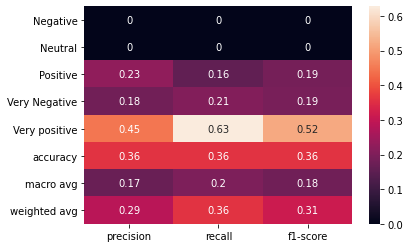

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_linearSVC,output_dict=True))

#**Multinomial NB Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()

**Train the model**

In [ ]:
multinomialNB_model = multinomialNB.fit(x_train,y_train)

**predict the ouput using multinomialNB**

In [ ]:
y_op_multinomialNB = multinomialNB_model.predict(x_test)

#**Metrics for Multinomial NB**

In [ ]:
fetch_the_cacuracy(y_op_multinomialNB,y_test)

Accuracy Score =  47.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        12
      Neutral       0.00      0.00      0.00        21
     Positive       0.00      0.00      0.00        44
Very Negative       0.00      0.00      0.00        29
Very positive       0.47      1.00      0.64        94

     accuracy                           0.47       200
    macro avg       0.09      0.20      0.13       200
 weighted avg       0.22      0.47      0.30       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_val_score_computation(multinomialNB_model,x_test,y_test)

Cross Validation Score 47.0 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


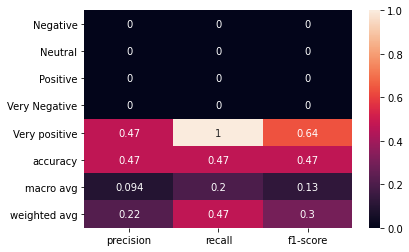

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_multinomialNB,output_dict=True))

#**Question 3: House price prediction**


(40 points). You are required to build a regression model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

In [508]:
import pandas as pd
train_data = pd.read_csv("/content/train.csv").dropna(axis=1).drop('Id',axis=1)
test_data = pd.read_csv("/content/test.csv").dropna(axis=1).drop('Id',axis=1)

In [509]:
train_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [510]:
test_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1156.534613,325.967786,3.543523,1486.045922,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,398.165820,420.610226,44.043251,485.566099,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,873.500000,0.000000,0.000000,1117.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,1079.000000,0.000000,0.000000,1432.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1382.500000,676.000000,0.000000,1721.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5095.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [511]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [512]:
len(train_data.columns)

61

In [513]:
test_data.columns

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [514]:
len(test_data.columns)

46

In [515]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [516]:
required_columns = intersection(train_data.columns.tolist(),test_data.columns.tolist())

In [517]:
temp_cols = intersection(train_data.columns.tolist(),test_data.columns.tolist())

In [518]:
test_data = test_data[required_columns]

In [528]:
test_data

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal
1,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal
2,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal
3,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal
4,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,Gd,Y,546,546,0,1092,1,1,3,1,5,0,Y,0,0,0,0,0,0,0,6,2006,Normal
1455,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,546,546,0,1092,1,1,3,1,6,0,Y,0,24,0,0,0,0,0,4,2006,Abnorml
1456,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,1224,0,0,1224,1,0,4,1,7,1,Y,474,0,0,0,0,0,0,9,2006,Abnorml
1457,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,TA,TA,PConc,GasA,TA,Y,970,0,0,970,1,0,3,1,6,0,Y,80,32,0,0,0,0,700,7,2006,Normal


In [520]:
required_columns.append("SalePrice")

In [521]:
train_data = train_data[required_columns]

In [523]:
train_data

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500
3,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000
4,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,953,694,0,1647,2,1,3,1,7,1,Y,0,40,0,0,0,0,0,8,2007,Normal,175000
1456,20,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,2073,0,0,2073,2,0,3,1,7,2,Y,349,0,0,0,0,0,0,2,2010,Normal,210000
1457,70,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,1188,1152,0,2340,2,0,4,1,9,2,Y,0,60,0,0,0,0,2500,5,2010,Normal,266500
1458,20,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,1078,0,0,1078,1,0,2,1,5,0,Y,366,0,112,0,0,0,0,4,2010,Normal,142125


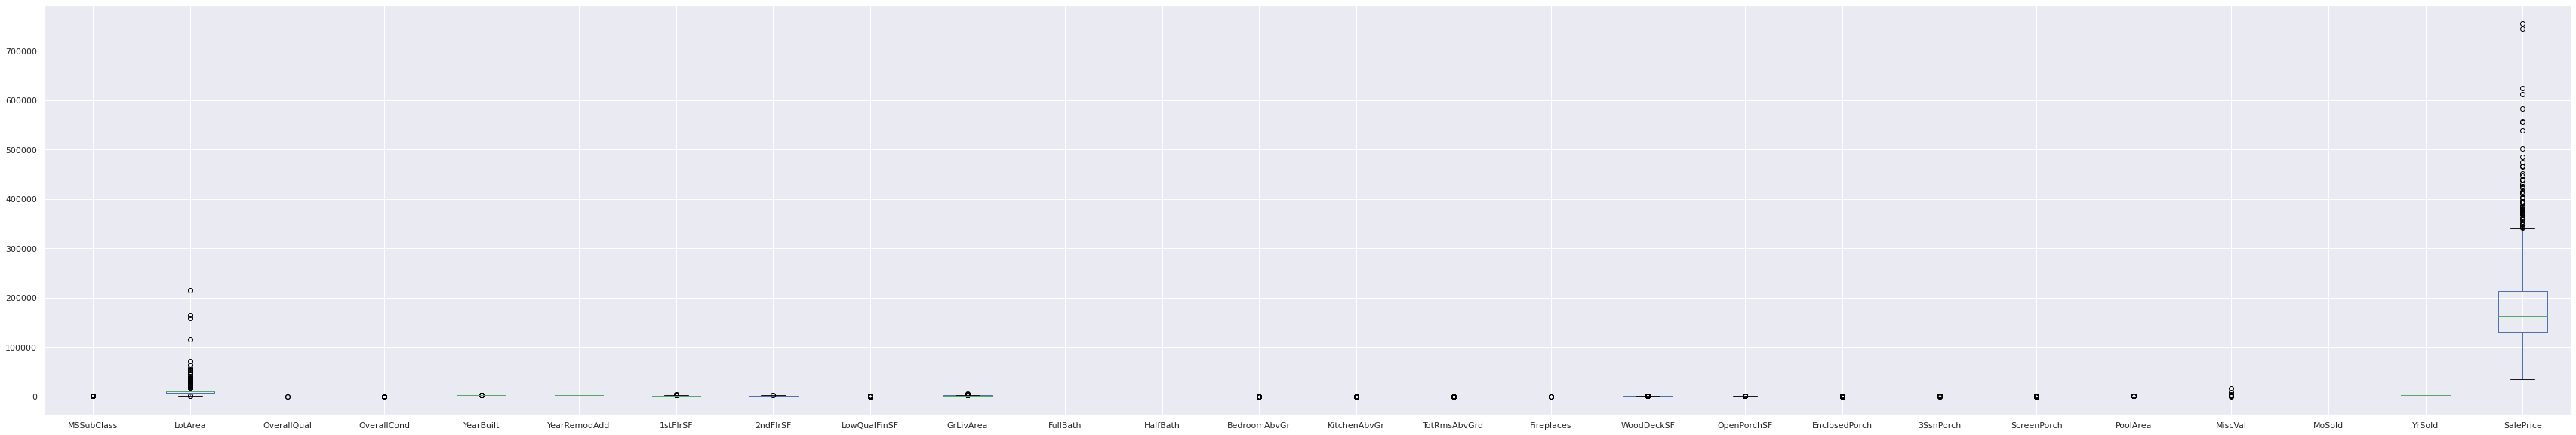

In [524]:
#

train_data.plot(kind = 'box',figsize= (60,10),sharex = False)
plt.show(block=False)

In [525]:
train_data_prediction = train_data.groupby('YrSold').aggregate({'SalePrice':'mean'})
train_data_prediction = train_data_prediction.reset_index()

In [526]:
train_data_prediction

,YrSold,SalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


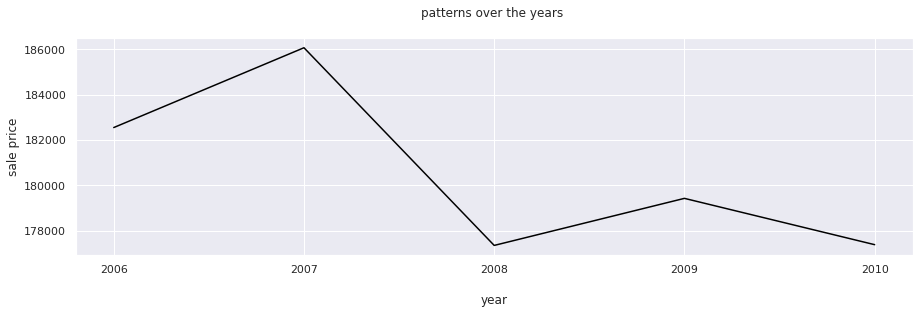

In [527]:
import seaborn as sns
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='YrSold', y='SalePrice', data=train_data_prediction, n_boot=1000, seed = 10,legend ='brief', color = 'black')
ax.set(xticks=train_data_prediction['YrSold'].values)
plt.xlabel("\nyear")
plt.ylabel("sale price")
plt.title("patterns over the years \n")
plt.show()

In [472]:
#Build a correlation matrix

%matplotlib inline

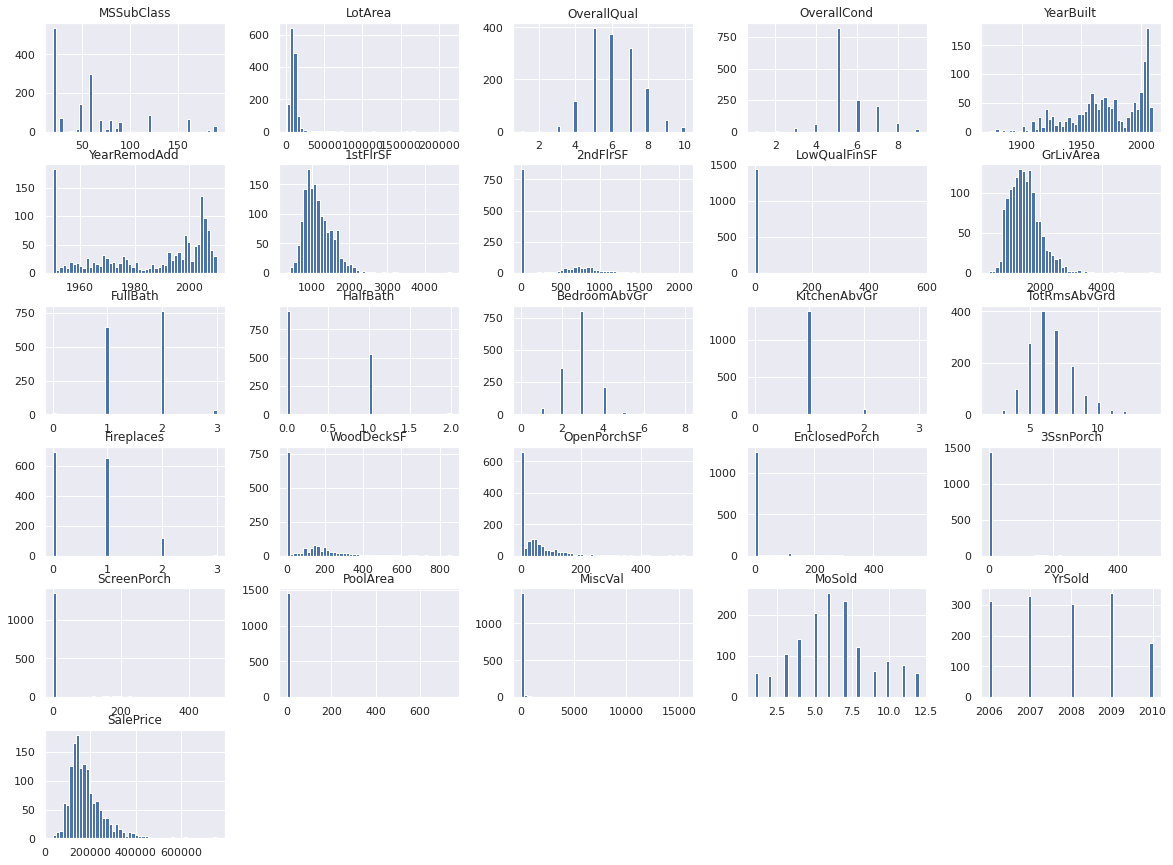

The Correlation Values are:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.054701,0.114561,0.248736,0.004046,0.128735,0.169926,0.184164,0.214924,0.047585,0.318432,0.245229,0.158424,0.168800,0.041164,0.274186,0.184141,0.125026,0.147339,-0.006712,0.043107,0.066183,0.083561,0.043257,0.052430,0.021426,0.275579
std,0.224312,0.210573,0.301930,0.224716,0.310019,0.265985,0.285353,0.276720,0.204532,0.296109,0.276783,0.244227,0.251988,0.230901,0.282689,0.234436,0.215532,0.215230,0.227716,0.197203,0.200358,0.193773,0.196830,0.198143,0.203042,0.311701
min,-0.251758,-0.139781,-0.183882,-0.375983,-0.387268,-0.193919,-0.251758,-0.202646,-0.183784,-0.079686,-0.194149,-0.119916,-0.070651,-0.183882,-0.057583,-0.123936,-0.125989,-0.093079,-0.387268,-0.043825,-0.082864,-0.059689,-0.034383,-0.145721,-0.145721,-0.135907
25%,-0.025382,0.007031,0.030935,-0.073584,-0.029192,0.007819,-0.014081,0.036525,-0.024626,0.081156,0.038916,-0.008031,0.020128,-0.082773,0.045131,0.003871,-0.007997,0.000181,-0.094757,-0.020266,-0.021549,0.006443,-0.010102,-0.005749,-0.028922,-0.004746
50%,-0.006892,0.047073,0.172365,-0.004574,0.029602,0.093161,0.129463,0.086826,0.002035,0.255274,0.162042,0.122230,0.097743,-0.003502,0.190877,0.158561,0.082772,0.089292,-0.021581,0.005806,0.041883,0.057482,0.000822,0.024903,-0.016965,0.273976
75%,0.045001,0.160281,0.464031,0.028083,0.238212,0.236859,0.360347,0.316472,0.057429,0.554835,0.434629,0.238655,0.191001,0.066661,0.422968,0.264441,0.204299,0.222641,0.032574,0.030146,0.070541,0.080533,0.023162,0.046413,0.009247,0.518948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [473]:
corr_matrix_data=train_data.hist(bins=50, figsize=(20,15))
plt.show()
corr_matrix = train_data.corr()
print('The Correlation Values are:\n', corr_matrix["SalePrice"].sort_values(ascending=False))
corr_matrix.describe()

In [531]:
test_data["SalePrice"] = 0

In [533]:
temp_df = pd.concat([train_data,test_data],axis=0)

In [534]:
temp_df

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500
3,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000
4,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,Gd,Y,546,546,0,1092,1,1,3,1,5,0,Y,0,0,0,0,0,0,0,6,2006,Normal,0
1455,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,546,546,0,1092,1,1,3,1,6,0,Y,0,24,0,0,0,0,0,4,2006,Abnorml,0
1456,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,1224,0,0,1224,1,0,4,1,7,1,Y,474,0,0,0,0,0,0,9,2006,Abnorml,0
1457,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,TA,TA,PConc,GasA,TA,Y,970,0,0,970,1,0,3,1,6,0,Y,80,32,0,0,0,0,700,7,2006,Normal,0


In [474]:
from sklearn.linear_model import LinearRegression

In [536]:
sample = train_data.head(1)
categorical_columns_list = list()
numeric_columns_list = list()
for i in sample.columns:
  if(type(sample[i].values[0])==str):
    categorical_columns_list.append(i)
  else:
    numeric_columns_list.append(i)
df = pd.get_dummies(temp_df[categorical_columns_list],columns = categorical_columns_list)

In [537]:
final_df = pd.concat([df,temp_df[numeric_columns_list]],axis=1)

In [541]:
array_values = final_df.values[:1460]
X = array_values[:,0:216]
Y = final_df["SalePrice"].values[:1460].tolist()
model = LinearRegression(fit_intercept=True,normalize=False)

In [542]:
from sklearn.model_selection import train_test_split

split the data to training and testing

In [543]:
test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

train the model

In [544]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [545]:
print (model.intercept_)
print (model.coef_)

-0.0061139321769587696
[ 1.19812125e-06  1.19808411e-06  7.12897372e-03  7.12897366e-03
  7.12897368e-03  7.12897370e-03 -5.75449090e-04 -5.75449060e-04
 -5.75449022e-04 -5.75449056e-04 -1.27522957e-03 -1.27522957e-03
 -1.27522955e-03 -1.27522954e-03 -1.27522955e-03  7.44640246e-04
  7.44640198e-04  7.44640277e-04  9.04577984e-05  9.04577954e-05
  9.04577787e-05  9.04577513e-05  9.04577717e-05  9.04577779e-05
  9.04577473e-05  9.04577641e-05  9.04577551e-05  9.04577618e-05
  9.04576766e-05  9.04577532e-05  9.04577387e-05  9.04577406e-05
  9.04577755e-05  9.04577911e-05  9.04577942e-05  9.04577511e-05
  9.04577383e-05  9.04577612e-05  9.04577622e-05  9.04577481e-05
  9.04578125e-05  9.04576910e-05  9.04577560e-05 -1.02573362e-07
 -1.02583163e-07 -1.02576717e-07 -1.02584711e-07 -1.02595461e-07
 -1.02601782e-07 -1.02577679e-07 -1.02536174e-07 -1.02553773e-07
 -6.81999012e-09 -6.91530742e-09 -6.90981175e-09 -6.98051731e-09
 -6.69732012e-09 -3.36293044e-08 -6.91200057e-09 -6.85826596e-09
  

predict the outputs

In [546]:
result = model.predict(X_test)

In [547]:
print("The average mean of the sales is ,",result.mean())

The average mean of the sales is , 184178.47925311167


In [548]:
result = [int(i) for i in result]

In [549]:
from sklearn.metrics import accuracy_score
print("The accuracy of model is ",accuracy_score(Y_test, result)*100)

The accuracy of model is  65.14522821576763


**Predict the test outcome**

In [561]:
test_data_predictors = model.predict(final_df.values[1461:][:,0:216])

In [566]:
test_data_predictors = [int(i) for i in test_data_predictors]

In [564]:
test_data_predictors

[151999,
 189000,
 172784,
 60000,
 123000,
 317999,
 142499,
 124000,
 136999,
 129499,
 246577,
 177499,
 109499,
 155835,
 190000,
 178000,
 190000,
 152000,
 140000,
 170000,
 183000,
 148000,
 128000,
 259999,
 312999,
 105999,
 105000,
 180000,
 212899,
 115000,
 162900,
 196000,
 316599,
 254999,
 173000,
 239000,
 134900,
 147000,
 269999,
 199999,
 105499,
 173000,
 155000,
 160000,
 323999,
 215000,
 202500,
 167000,
 241999,
 214000,
 275000,
 166000,
 156932,
 192500,
 118000,
 124000,
 276999,
 146500,
 206900,
 192000,
 144500,
 228500,
 140000,
 131000,
 90000,
 181133,
 128000,
 172400,
 147000,
 161999,
 220999,
 154000,
 97000,
 125000,
 474999,
 319999,
 164999,
 108000,
 140000,
 98000,
 145000,
 422999,
 184999,
 394431,
 344999,
 130250,
 119000,
 135000,
 385000,
 93500,
 367293,
 123999,
 484999,
 171000,
 116500,
 185000,
 221999,
 127500,
 140000,
 129000,
 143900,
 138799,
 279499,
 193879,
 129000,
 224499,
 133000,
 277499,
 205000,
 137000,
 83000,
 88000,